In [105]:
# load afm423_finratio_data.csv as data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Dont show warnings
import warnings
warnings.filterwarnings("ignore")

## Data

- Here is a list of all the features in this dataset, along with the formula used: https://wrds-www.wharton.upenn.edu/documents/793/WRDS_Industry_Financial_Ratio_Manual.pdf
- The financial ratios data is loaded into `df` and the column/feature names along with their description and category are loaded into `df_columns`.
- There are 70 features spread across 7 categories: `Capitalization`, `Efficiency`, `Financial Soundness/Solvency`, `Liquidity`, `Profitability`, `Valuation`, and `Others`.

In [106]:
# Load the data
df = pd.read_csv('afm423_finratio_data.csv')

# Rename columns
df.rename(columns={
    'public_date': 'date'
}, inplace=True)

# Convert data types
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['gvkey'] = pd.to_numeric(df['gvkey'], errors='coerce')

# Load column names info
df_columns = pd.read_csv('afm423_finratio_columns.csv')

df.head()

,gvkey,permno,adate,qdate,date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,...,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward,TICKER,cusip
0,1004,54594,1979-05-31,1979-11-30,1980-01-31,14.258,1.179,5.434,NaN,NaN,...,0.0,0.0,0.084,1.312,0.403,2.78%,1.516,NaN,AIR,00036110
1,1004,54594,1979-05-31,1979-11-30,1980-02-29,14.623,1.179,5.434,NaN,NaN,...,0.0,0.0,0.084,1.345,0.413,2.71%,0.470,NaN,AIR,00036110
2,1004,54594,1979-05-31,1979-11-30,1980-03-31,10.286,1.179,5.434,NaN,NaN,...,0.0,0.0,0.084,0.946,0.291,3.86%,0.367,NaN,AIR,00036110
3,1004,54594,1979-05-31,1980-02-29,1980-04-30,9.899,0.734,5.730,NaN,NaN,...,0.0,0.0,0.078,0.862,0.236,3.86%,0.340,NaN,AIR,00036110
4,1004,54594,1979-05-31,1980-02-29,1980-05-31,10.889,0.734,5.730,NaN,NaN,...,0.0,0.0,0.078,0.948,0.233,3.90%,0.377,NaN,AIR,00036110


#### Data Visualization

- We see that to get rectangular data, we will need to choose a smaller timeframe. Hoping to keep more than half the companies of the current `S&P 1500` constituents and at least 25 years of data, we chose to keep data from Jan 2000 to Dec 2024.

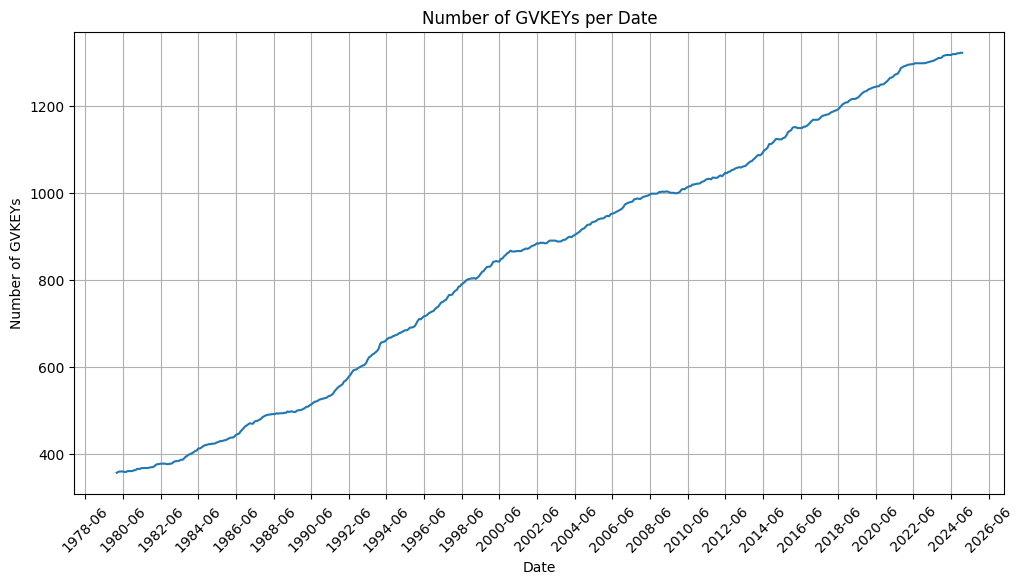

,date,number_of_gvkeys


In [ ]:
# Plot the number of gvkeys per date
gvkey_counts = df.groupby('date')['gvkey'].nunique().reset_index()  # Count the number of unique gvkeys for each date
gvkey_counts.columns = ['date', 'number_of_gvkeys']                 # Rename columns for clarity

plt.figure(figsize=(12, 6))
plt.plot(gvkey_counts['date'], gvkey_counts['number_of_gvkeys'])
plt.xlabel('Date')
plt.ylabel('Number of GVKEYs')
plt.title('Number of GVKEYs per Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid()
plt.show()

# Set the cutoff date to 2000-01-01
cutoff_date = pd.to_datetime('2000-01-01')
gvkey_counts[gvkey_counts['date'] == cutoff_date]

In [108]:
# Filter the data for the year 1998 onwards
df = df[df['date'] > cutoff_date]

# Keep only the companies with full data (i.e., 300 months of data)
df = df[df['gvkey'].isin(df['gvkey'].value_counts()[df['gvkey'].value_counts() == 300].index)]

# Remove gvkeys that have more than 1 permno (as this means we don't actually have full data for the stock, there are multiple stocks/classes)
gvkey_permno_counts = df.groupby('gvkey')['permno'].nunique()
gvkey_permno_counts = gvkey_permno_counts[gvkey_permno_counts > 1].index.tolist()
print(f"Gvkeys with more than 1 permno: {gvkey_permno_counts}")
df = df[~df['gvkey'].isin(gvkey_permno_counts)]

# Check the number of gvkeys and the number of months
print(f"Number of gvkeys: {df['gvkey'].nunique()}")
print(f"Number of months: {df['date'].nunique()}")

df

Gvkeys with more than 1 permno: [1076, 2176, 3226, 3580, 3708, 4060, 4723, 4809, 4818, 10121, 12441, 25536, 26061, 28194, 30861, 63000, 64410, 65009, 65228, 126423]
Number of gvkeys: 752
Number of months: 300


,gvkey,permno,adate,qdate,date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,...,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward,TICKER,cusip
240,1004,54594,1999-05-31,1999-11-30,2000-01-31,18.333,0.858,6.916,11.055,11.195,...,0.0,0.0,0.036,1.250,0.427,1.92%,0.920,0.730,AIR,00036110
241,1004,54594,1999-05-31,1999-11-30,2000-02-29,24.617,0.858,6.916,14.844,15.032,...,0.0,0.0,0.036,1.678,0.574,1.43%,1.308,0.980,AIR,00036110
242,1004,54594,1999-05-31,1999-11-30,2000-03-31,17.296,0.858,6.916,10.430,10.562,...,0.0,0.0,0.036,1.179,0.403,2.04%,0.976,0.689,AIR,00036110
243,1004,54594,1999-05-31,2000-02-29,2000-04-30,14.516,0.617,7.390,9.241,9.356,...,0.0,0.0,0.047,1.028,0.396,2.26%,0.922,0.645,AIR,00036110
244,1004,54594,1999-05-31,2000-02-29,2000-05-31,13.372,0.617,7.390,8.512,8.618,...,0.0,0.0,0.047,0.947,0.365,2.45%,0.909,0.594,AIR,00036110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401562,126721,87445,2023-12-31,2024-06-30,2024-08-31,34.479,0.534,17.115,25.932,26.278,...,0.0,0.0,-0.012,2.082,0.937,NaN,-17.823,NaN,TDY,87936010
401563,126721,87445,2023-12-31,2024-06-30,2024-09-30,34.866,0.534,17.115,26.223,26.573,...,0.0,0.0,-0.012,2.105,0.948,NaN,-18.023,NaN,TDY,87936010
401564,126721,87445,2023-12-31,2024-06-30,2024-10-31,36.132,0.534,17.115,27.281,27.645,...,0.0,0.0,-0.012,2.181,0.986,NaN,-18.750,NaN,TDY,87936010
401565,126721,87445,2023-12-31,2024-09-30,2024-11-30,36.737,0.489,17.187,29.057,29.410,...,0.0,0.0,-0.006,2.265,0.928,NaN,-19.342,NaN,TDY,87936010


#### Handling Missing Values

- Here we visualize the missing values using a `heatmap` and see that there are many missing values throughout the dataset, with some columns having more NAs than others.
- We want to remove any column/variable that is missing more than 15% of the data in our timeframe, so we remove the columns `PEG_trailing`, `sale_nwc`, `divyield`, `PEG_ltgforward`, `cash_conversion`, `int_debt`, `invt_act`, `int_totdebt`, `pretret_earnat`, `pretret_noa`, `rect_act`, `ocf_lct`, `curr_debt`, `profit_lct`, `curr_ratio`, `cash_ratio`, `quick_ratio`, `intcov_ratio`, `intcov`, and `inv_turn`.
- Can also drop `adate` and `qdate` as these are simply the company's year end and quarter end dates, and `public_date` is the date for that entry.
- We have identifiers `gvkey` and `permno`, so we can remove `TICKER` and `cusip` for now.

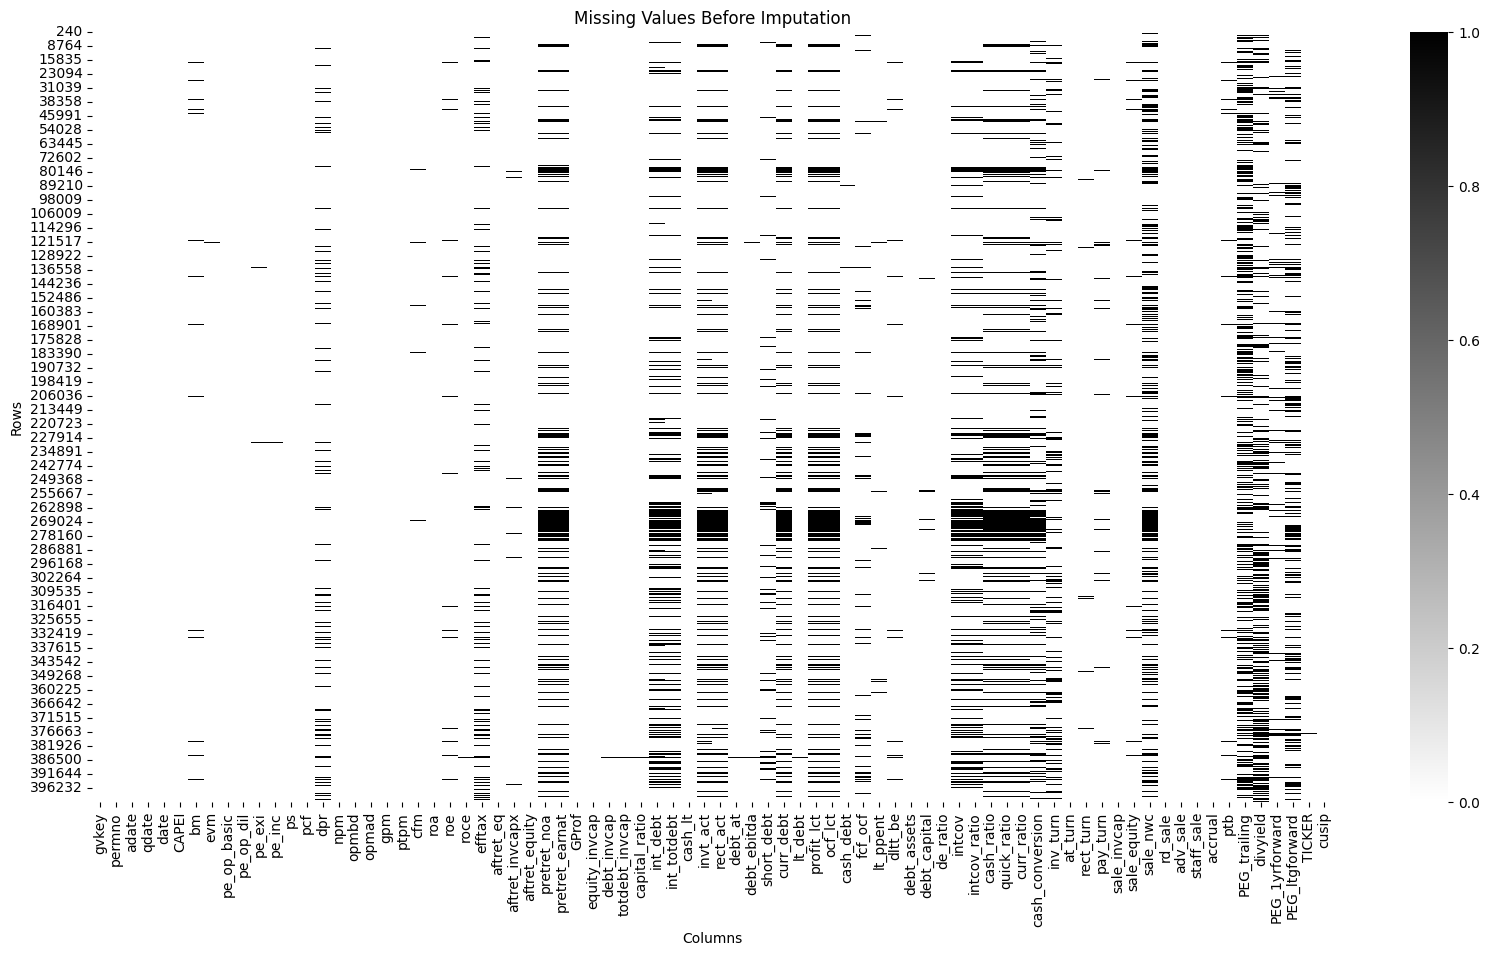


Missing Values Before Imputation:
        Column Name  Missing Values    Percent
0      PEG_trailing           79173  35.094415
1          sale_nwc           67938  30.114362
2          divyield           65700  29.122340
3    PEG_ltgforward           55854  24.757979
4   cash_conversion           47505  21.057181
5          int_debt           45083  19.983599
6          invt_act           42962  19.043440
7       int_totdebt           42843  18.990691
8    pretret_earnat           41201  18.262855
9       pretret_noa           41201  18.262855
10         rect_act           41062  18.201241
11          ocf_lct           40847  18.105940
12        curr_debt           40759  18.066933
13       profit_lct           40688  18.035461
14       curr_ratio           40672  18.028369
15       cash_ratio           40672  18.028369
16      quick_ratio           40672  18.028369
17     intcov_ratio           39362  17.447695
18           intcov           39353  17.443706
19         inv_turn      

,gvkey,permno,date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_1yrforward
240,1004,54594,2000-01-31,18.333,0.858,6.916,11.055,11.195,11.195,11.195,...,6.605,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.250,0.920
241,1004,54594,2000-02-29,24.617,0.858,6.916,14.844,15.032,15.032,15.032,...,6.605,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.678,1.308
242,1004,54594,2000-03-31,17.296,0.858,6.916,10.430,10.562,10.562,10.562,...,6.605,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.179,0.976
243,1004,54594,2000-04-30,14.516,0.617,7.390,9.241,9.356,9.356,9.356,...,6.570,7.764,2.064,3.176,0.000,0.0,0.0,0.047,1.028,0.922
244,1004,54594,2000-05-31,13.372,0.617,7.390,8.512,8.618,8.618,8.618,...,6.570,7.764,2.064,3.176,0.000,0.0,0.0,0.047,0.947,0.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401562,126721,87445,2024-08-31,34.479,0.534,17.115,25.932,26.278,23.535,23.535,...,4.684,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.082,-17.823
401563,126721,87445,2024-09-30,34.866,0.534,17.115,26.223,26.573,23.799,23.799,...,4.684,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.105,-18.023
401564,126721,87445,2024-10-31,36.132,0.534,17.115,27.281,27.645,24.759,24.759,...,4.684,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.181,-18.750
401565,126721,87445,2024-11-30,36.737,0.489,17.187,29.057,29.410,24.558,24.558,...,4.653,7.485,0.464,0.597,0.065,0.0,0.0,-0.006,2.265,-19.342


In [109]:
def missing_values_check(data, title):
    """
    This function checks for missing values in the data frame and returns a table with the number and percent of missing values.
    """
    # give a table of the column name with number and percent of missing values in each column
    missing_values = data.isnull().sum()
    missing_values_percent = (missing_values / len(data)) * 100
    missing_values_table = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_values_percent})
    missing_values_table = missing_values_table[missing_values_table['Missing Values'] > 0]
    missing_values_table = missing_values_table.sort_values(by='Missing Values', ascending=False)
    missing_values_table.reset_index(inplace=True)
    missing_values_table.columns = ['Column Name', 'Missing Values', 'Percent']
    missing_values_table = missing_values_table[['Column Name', 'Missing Values', 'Percent']]
    missing_values_table.reset_index(drop=True, inplace=True)

    print(f"\n{title}:")
    print("==============================================")
    print(missing_values_table.head(20))
    return missing_values_table

# Check for missing values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=True, cmap='binary')
plt.title("Missing Values Before Imputation")
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

missing_values_table = missing_values_check(df, "Missing Values Before Imputation")

# Drop columns with more than 20% missing values
columns_to_drop = missing_values_table[missing_values_table['Percent'] > 15]['Column Name'].tolist()
columns_to_drop.append('adate')
columns_to_drop.append('qdate')
columns_to_drop.append('TICKER')
columns_to_drop.append('cusip')
df.drop(columns=columns_to_drop, inplace=True)
df

In [110]:
# Get all feature names
columns = df.columns[3:].tolist()

# Sort by firm and date
df = df.sort_values(by=['gvkey', 'date'])

# List of ratio columns to impute using rolling 18-month average (all columns except 'gvkey', 'date', and 'permno')
ratio_cols = columns

# Apply rolling 18-month average imputation for each firm
for i in range(5):
    for col in ratio_cols:
        df[col] = df.groupby('gvkey')[col].transform(
            lambda x: x.fillna(x.rolling(window=18, min_periods=1).mean())
        )

# Fill any remaining NaN values with the median of the column per gvkey
for col in ratio_cols:
    df[col] = df.groupby('gvkey')[col].transform(
        lambda x: x.fillna(x.median())
    )

# The remaing NaN values are only for companies that have no data for that column, so we can drop these rows
df.dropna(inplace=True)

# Check for missing values again
missing_values_check(df, "Missing Values After Imputation")

df


Missing Values After Imputation:
Empty DataFrame
Columns: [Column Name, Missing Values, Percent]
Index: []


,gvkey,permno,date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_1yrforward
240,1004,54594,2000-01-31,18.333,0.858,6.916,11.055,11.195,11.195,11.195,...,6.605,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.250,0.920
241,1004,54594,2000-02-29,24.617,0.858,6.916,14.844,15.032,15.032,15.032,...,6.605,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.678,1.308
242,1004,54594,2000-03-31,17.296,0.858,6.916,10.430,10.562,10.562,10.562,...,6.605,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.179,0.976
243,1004,54594,2000-04-30,14.516,0.617,7.390,9.241,9.356,9.356,9.356,...,6.570,7.764,2.064,3.176,0.000,0.0,0.0,0.047,1.028,0.922
244,1004,54594,2000-05-31,13.372,0.617,7.390,8.512,8.618,8.618,8.618,...,6.570,7.764,2.064,3.176,0.000,0.0,0.0,0.047,0.947,0.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401562,126721,87445,2024-08-31,34.479,0.534,17.115,25.932,26.278,23.535,23.535,...,4.684,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.082,-17.823
401563,126721,87445,2024-09-30,34.866,0.534,17.115,26.223,26.573,23.799,23.799,...,4.684,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.105,-18.023
401564,126721,87445,2024-10-31,36.132,0.534,17.115,27.281,27.645,24.759,24.759,...,4.684,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.181,-18.750
401565,126721,87445,2024-11-30,36.737,0.489,17.187,29.057,29.410,24.558,24.558,...,4.653,7.485,0.464,0.597,0.065,0.0,0.0,-0.006,2.265,-19.342


#### Returns Data

- Load in CRSP returns data and roll back the date to previous month end to be used as merging key (so month t's financials are matched with month (t+1)'s returns for the training).
- Merge cleaned returns data into df, finally giving us 51 features and 743 companies (total 229000 entries) with no NAs and no duplicates.

In [111]:
# Import the data from the csv file
returns = pd.read_csv('afm423_returns.csv')

# Rename columns
returns.rename(columns={
    'datadate': 'date'
}, inplace=True)

# Convert data types
returns['date'] = pd.to_datetime(returns['date'], format='%Y-%m-%d')
returns['LPERMNO'] = pd.to_numeric(returns['LPERMNO'], errors='coerce')

# Roll date to previous month to be used as merging key (so month t's financials are matched with month (t+1)'s returns)
returns['date_merge'] = returns['date'].dt.to_period('M').dt.to_timestamp()
returns['date_merge'] = returns['date_merge'] - pd.DateOffset(days=1)

# Sort by datadate and gvkey
returns = returns[['LPERMNO', 'date_merge', 'trt1m']]
returns = returns[returns['date_merge'] > cutoff_date]
returns = returns[returns['date_merge'] < pd.to_datetime('2025-01-01')]
returns.sort_values(by=['LPERMNO', 'date_merge'], inplace=True)
returns.reset_index(drop=True, inplace=True)

missing_values_check(returns, "Missing Values In Returns Data")

# Fill na values with 0
returns['trt1m'] = returns['trt1m'].fillna(0)

returns


Missing Values In Returns Data:
  Column Name  Missing Values   Percent
0       trt1m             519  0.141343


,LPERMNO,date_merge,trt1m
0,10026,2000-01-31,-3.5948
1,10026,2000-02-29,7.7966
2,10026,2000-03-31,-19.8113
3,10026,2000-04-30,-6.6667
4,10026,2000-05-31,20.1681
...,...,...,...
367188,93436,2024-08-31,22.1942
367189,93436,2024-09-30,-4.5025
367190,93436,2024-10-31,38.1469
367191,93436,2024-11-30,17.0008


In [112]:
# Merge the returns data with the financial ratios data
df = pd.merge(df, returns, how='left', left_on=['permno', 'date'], right_on=['LPERMNO', 'date_merge'])
df.drop(columns=['LPERMNO', 'date_merge'], inplace=True)

# Check for missing values again
missing_values_check(df, "Missing Values After Merging with Returns")

df


Missing Values After Merging with Returns:
Empty DataFrame
Columns: [Column Name, Missing Values, Percent]
Index: []


,gvkey,permno,date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_1yrforward,trt1m
0,1004,54594,2000-01-31,18.333,0.858,6.916,11.055,11.195,11.195,11.195,...,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.250,0.920,34.2756
1,1004,54594,2000-02-29,24.617,0.858,6.916,14.844,15.032,15.032,15.032,...,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.678,1.308,-29.7368
2,1004,54594,2000-03-31,17.296,0.858,6.916,10.430,10.562,10.562,10.562,...,7.412,2.045,3.165,0.000,0.0,0.0,0.036,1.179,0.976,-9.2285
3,1004,54594,2000-04-30,14.516,0.617,7.390,9.241,9.356,9.356,9.356,...,7.764,2.064,3.176,0.000,0.0,0.0,0.047,1.028,0.922,-7.8838
4,1004,54594,2000-05-31,13.372,0.617,7.390,8.512,8.618,8.618,8.618,...,7.764,2.064,3.176,0.000,0.0,0.0,0.047,0.947,0.909,-13.5135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222895,126721,87445,2024-08-31,34.479,0.534,17.115,25.932,26.278,23.535,23.535,...,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.082,-17.823,1.1229
222896,126721,87445,2024-09-30,34.866,0.534,17.115,26.223,26.573,23.799,23.799,...,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.105,-18.023,4.0351
222897,126721,87445,2024-10-31,36.132,0.534,17.115,27.281,27.645,24.759,24.759,...,7.358,0.468,0.607,0.066,0.0,0.0,-0.012,2.181,-18.750,6.5756
222898,126721,87445,2024-11-30,36.737,0.489,17.187,29.057,29.410,24.558,24.558,...,7.485,0.464,0.597,0.065,0.0,0.0,-0.006,2.265,-19.342,-4.3544


In [113]:
# Export the data to a csv file
# df.to_csv('afm423_final_data.csv', index=False)

## Modeling

#### LASSO Regression